In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv('property-price.csv')
df

,Area,Bedroom,Age,Price
0,2600,3.0,20,55.0
1,3000,4.0,15,56.5
2,3200,3.5,18,61.0
3,3600,3.0,30,59.5
4,4000,5.0,8,76.0
5,5000,6.0,10,64.0
6,7000,7.0,15,70.0
7,4500,5.0,25,60.0
8,4500,4.0,15,43.0
9,1500,2.0,10,40.0


In [4]:
# EDA

<Axes: xlabel='Area', ylabel='Price'>

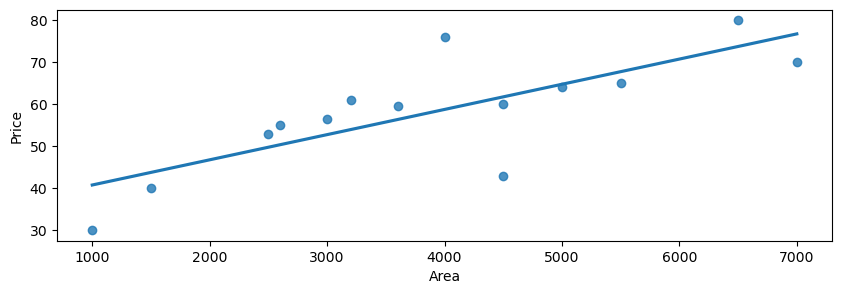

In [5]:
plt.figure(figsize=(10, 3))
sns.regplot(x = 'Area', y = 'Price', data = df, ci=0)

<Axes: xlabel='Bedroom', ylabel='Price'>

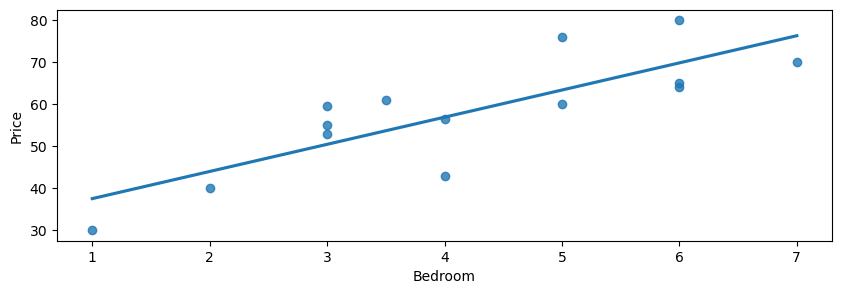

In [6]:
plt.figure(figsize=(10, 3))
sns.regplot(x = 'Bedroom', y = 'Price', data = df, ci=0)

<Axes: xlabel='Age', ylabel='Price'>

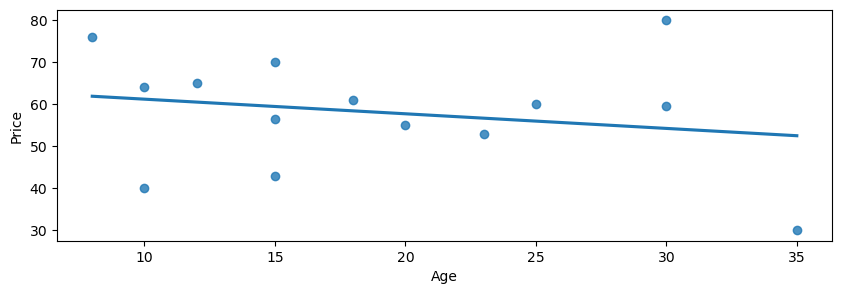

In [7]:
plt.figure(figsize=(10, 3))
sns.regplot(x = 'Age', y = 'Price', data = df, ci=0)

<Axes: >

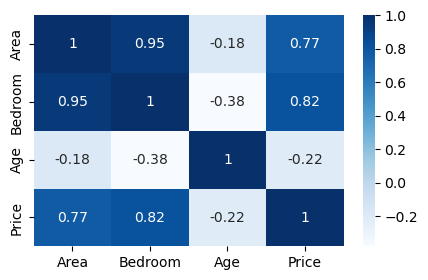

In [8]:
plt.figure(figsize=(5, 3))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='Blues')

In [9]:
# Area and Bedroom are havong +ve correlation with Price
# Age is neutral

In [10]:
X = df.drop(['Price'], axis = 1)
X

,Area,Bedroom,Age
0,2600,3.0,20
1,3000,4.0,15
2,3200,3.5,18
3,3600,3.0,30
4,4000,5.0,8
5,5000,6.0,10
6,7000,7.0,15
7,4500,5.0,25
8,4500,4.0,15
9,1500,2.0,10


In [11]:
y = df['Price']
y

0     55.0
1     56.5
2     61.0
3     59.5
4     76.0
5     64.0
6     70.0
7     60.0
8     43.0
9     40.0
10    80.0
11    53.0
12    30.0
13    65.0
Name: Price, dtype: float64

In [12]:
# Split the data into 80:20 train and test

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X_train

,Area,Bedroom,Age
12,1000,1.0,35
5,5000,6.0,10
8,4500,4.0,15
2,3200,3.5,18
1,3000,4.0,15
13,5500,6.0,12
4,4000,5.0,8
7,4500,5.0,25
10,6500,6.0,30
3,3600,3.0,30


In [16]:
X_test

,Area,Bedroom,Age
9,1500,2.0,10
11,2500,3.0,23
0,2600,3.0,20


In [17]:
# Creating the model

In [18]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [19]:
np.round(model.coef_, 2)

array([-0.  , 10.27,  0.32])

In [20]:
model.intercept_

20.253264688117596

In [21]:
# y = m * x + c
# y = m1x1 + m2x2 + m3x3 +c

In [22]:
y_pred = model.predict(X_test)
y_pred

array([39.47122735, 50.9191323 , 49.63992335])

In [23]:
r2_score(y_test, y_pred)

0.7486932220091578

In [24]:
model.predict( [[3800, 4, 24]] )

array([57.55451762])

In [25]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 1.1)
ridge.fit(X_train, y_train)

Ridge(alpha=1.1)

In [26]:
np.round(ridge.coef_,2)

array([0.  , 6.24, 0.11])

In [27]:
ridge.score(X_test, y_test)

0.7131493466108998

In [28]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.7)
lasso.fit(X_train, y_train)

Lasso(alpha=0.7)

In [30]:
np.round(lasso.coef_,2)

array([0.  , 5.51, 0.07])

In [31]:
lasso.score(X_test, y_test)

0.6908196743926382